In [526]:
#Importation des librairies
import warnings
warnings.filterwarnings("ignore")

import os
import re
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import nlp_module
import string,unicodedata
from sklearn.preprocessing import MultiLabelBinarizer

from string import punctuation
from nltk.corpus import stopwords
from time import time

pd.set_option("display.max_columns", None)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [527]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

## Import du dataset et vérification de la donnée

In [528]:
df1 = pd.read_csv("QueryResults1.csv", sep=',')
df2 = pd.read_csv("QueryResults2.csv", sep=',')
df3 = pd.read_csv("QueryResults3.csv", sep=',')


In [529]:
df1

Title  \
0      How do I set permissions (attributes) on a fil...   
1               How do you get a directory listing in C?   
2                       Returning DataTables in WCF/.NET   
3      flutter: no refresh indicator when using Refre...   
4      Angularjs Form/Field validation using JavaScri...   
...                                                  ...   
46032  How do I fix the npm UNMET PEER DEPENDENCY war...   
46033     Why does Math.min() return -0 from [+0, 0, -0]   
46034  What's the mathematical reason behind Python c...   
46035  Unable to load class AndroidComponentsExtensio...   
46036        CentOS through a VM - no URLs in mirrorlist   

                                                    Body  \
0      <p>When I extract files from a ZIP file create...   
1      <p>How do you scan a directory for folders and...   
2      <p>I have a WCF service from which I want to r...   
3      <p>I added the RefreshIndicator to my page, bu...   
4      <p>Is there a way to validate a field in angul...   
...                                                  ...   
46032  <p>I'm on Windows 10, with Node 5.6.0 and npm ...   
46033  <p>I know (-0 === 0) comes out to be true. I a...   
46034  <p>I know Python <code>//</code> rounds toward...   
46035  <p>I recently downloaded <a href="https://deve...   
46036  <p>I am trying to run a <a href="https://en.wi...   

                                                    Tags        Id  Score  \
0      <python><attributes><zip><file-permissions><zi...    434641     46   
1      <c><file><directory><cross-platform><common-ta...     12489     65   
2               <c#><.net><wcf><web-services><datatable>     12702     51   
3      <flutter><dart><refresh><pull-to-refresh><indi...  54051121     33   
4      <javascript><validation><angularjs><angular-ui...  18125777     10   
...                                                  ...       ...    ...   
46032  <angularjs><node.js><npm><npm-install><angular...  35738346    283   
46033  <javascript><math><floating-point><min><negati...  70450352     59   
46034  <python><c++><python-3.x><rounding><integer-di...  70730831     85   
46035  <android><android-gradle-plugin><android-archi...  70857476    123   
46036       <linux><centos><vagrant><virtualbox><redhat>  70926799     51   

       ViewCount  FavoriteCount  AnswerCount  
0          29340              7            8  
1         136478             21            9  
2          56219             12            8  
3          46515              7            5  
4          30234              7            4  
...          ...            ...          ...  
46032     338197             48           13  
46033       3803              7            4  
46034       7540              9            8  
46035      12650              7            7  
46036      49435             21            2  

[46037 rows x 8 columns]

In [530]:
df = pd.concat([df1, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)
df = df.drop_duplicates()

<AxesSubplot:>

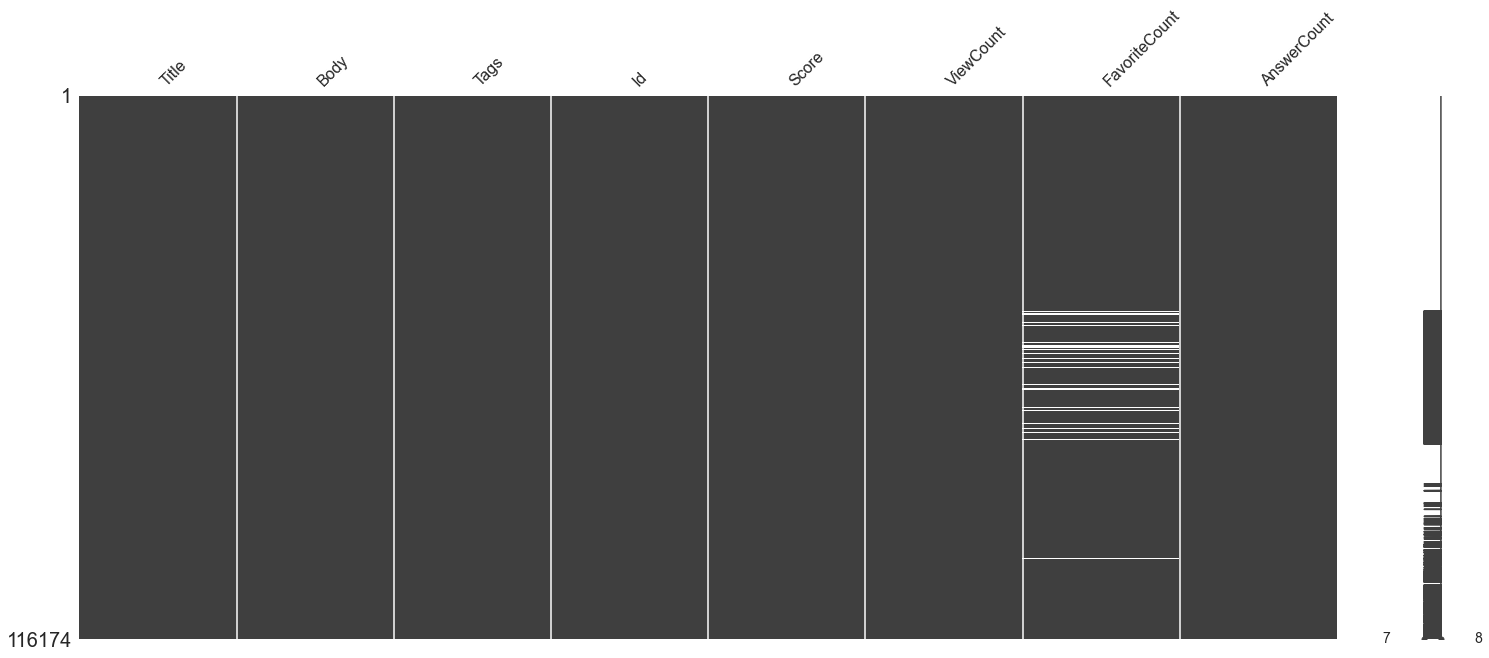

In [531]:
msno.matrix(df)

In [532]:
df["Score"].describe()

count    116174.000000
mean         64.677733
std         248.628383
min           6.000000
25%          16.000000
50%          27.000000
75%          52.000000
max       26354.000000
Name: Score, dtype: float64

In [533]:
df["ViewCount"].describe()

count    1.161740e+05
mean     6.307668e+04
std      1.714967e+05
min      5.500000e+01
25%      7.994000e+03
50%      2.343800e+04
75%      5.936775e+04
max      9.841945e+06
Name: ViewCount, dtype: float64

In [534]:
df["FavoriteCount"].describe()

count    111814.000000
mean         23.519202
std         105.739197
min           0.000000
25%           6.000000
50%          10.000000
75%          19.000000
max       11570.000000
Name: FavoriteCount, dtype: float64

In [535]:
df["AnswerCount"].describe()

count    116174.000000
mean          5.275879
std           5.321968
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         125.000000
Name: AnswerCount, dtype: float64

## Analyse Univariée

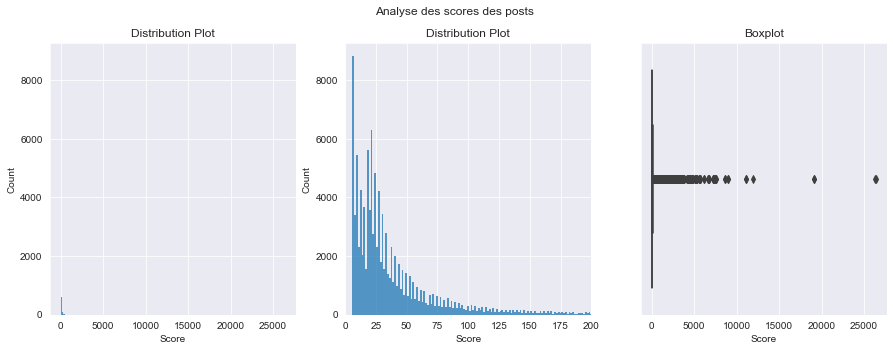

In [536]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des scores des posts")

sns.histplot(ax=axes[0], x="Score", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="Score", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,200])

sns.boxplot(ax=axes[2], x="Score", data=df)
axes[2].set_title("Boxplot")

plt.savefig('score.png')
plt.show()

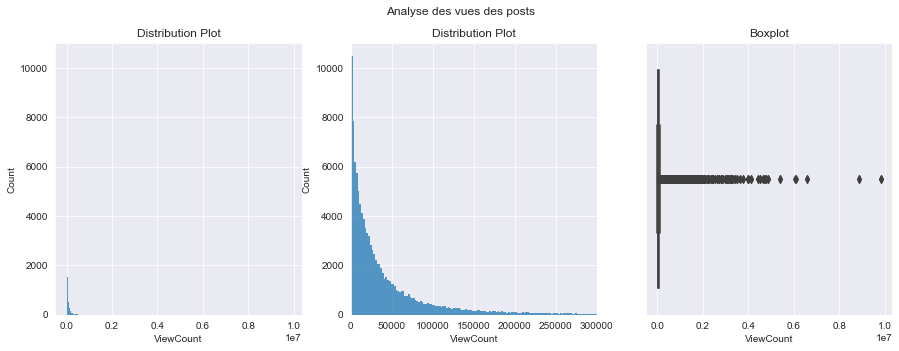

In [537]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="ViewCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="ViewCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,300000])

sns.boxplot(ax=axes[2], x="ViewCount", data=df)
axes[2].set_title("Boxplot")

plt.savefig('viewcount.png')
plt.show()


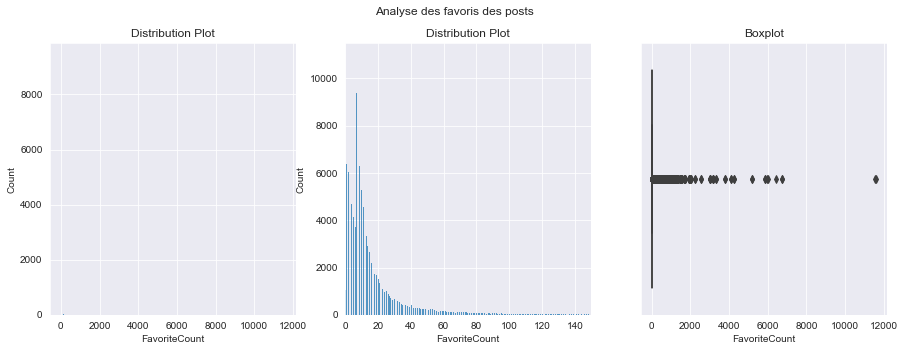

In [538]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des favoris des posts")

sns.histplot(ax=axes[0], x="FavoriteCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="FavoriteCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,150])
axes[1].set_ylim([0,11500])

sns.boxplot(ax=axes[2], x="FavoriteCount", data=df)
axes[2].set_title("Boxplot")

plt.savefig('favoritecount.png')
plt.show()

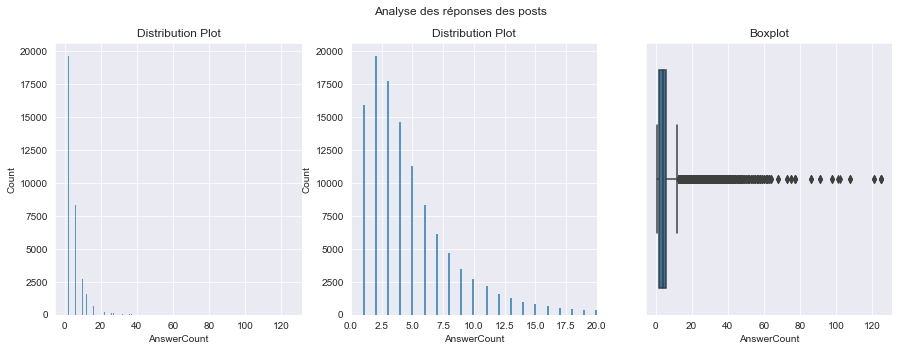

In [539]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des réponses des posts")

sns.histplot(ax=axes[0], x="AnswerCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="AnswerCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,20])

sns.boxplot(ax=axes[2], x="AnswerCount", data=df)
axes[2].set_title("Boxplot")

plt.savefig('answercount.png')
plt.show()

In [540]:
df["Tags"]

0         <python><attributes><zip><file-permissions><zi...
1         <c><file><directory><cross-platform><common-ta...
2                  <c#><.net><wcf><web-services><datatable>
3         <flutter><dart><refresh><pull-to-refresh><indi...
4         <javascript><validation><angularjs><angular-ui...
                                ...                        
124742         <android><camera><android-camera><adb><ddms>
124743    <c#><asp.net-mvc-5><entity-framework-6><asp.ne...
124744            <javascript><css><html><tags><mime-types>
124745    <git><git-submodules><git-clone><cloning><git-...
124747    <java><android><gson><bouncycastle><android-lint>
Name: Tags, Length: 116174, dtype: object

In [541]:
df["Tags"] = df["Tags"].str.replace("<","")
df["Tags"] = df["Tags"].str.replace(">"," ")

In [542]:
df["Tags"] = df.Tags.apply(lambda x: x[0:-1].split(' '))

In [543]:
df["Tags"]

0         [python, attributes, zip, file-permissions, zi...
1         [c, file, directory, cross-platform, common-ta...
2                  [c#, .net, wcf, web-services, datatable]
3         [flutter, dart, refresh, pull-to-refresh, indi...
4         [javascript, validation, angularjs, angular-ui...
                                ...                        
124742         [android, camera, android-camera, adb, ddms]
124743    [c#, asp.net-mvc-5, entity-framework-6, asp.ne...
124744            [javascript, css, html, tags, mime-types]
124745    [git, git-submodules, git-clone, cloning, git-...
124747    [java, android, gson, bouncycastle, android-lint]
Name: Tags, Length: 116174, dtype: object

In [544]:
df["Tags_cpt"] = df.Tags.str.len()
df["Tags_cpt"].describe()

count    116174.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: Tags_cpt, dtype: float64

In [545]:
df_tags = pd.DataFrame(df['Tags'].to_list(), columns = ['Tags1', 'Tags2', 'Tags3','Tags4','Tags5'])

In [546]:
df_tags

Tags1           Tags2               Tags3             Tags4  \
0           python      attributes                 zip  file-permissions   
1                c            file           directory    cross-platform   
2               c#            .net                 wcf      web-services   
3          flutter            dart             refresh   pull-to-refresh   
4       javascript      validation           angularjs        angular-ui   
...            ...             ...                 ...               ...   
116169     android          camera      android-camera               adb   
116170          c#   asp.net-mvc-5  entity-framework-6  asp.net-identity   
116171  javascript             css                html              tags   
116172         git  git-submodules           git-clone           cloning   
116173        java         android                gson      bouncycastle   

                     Tags5  
0                  zipfile  
1             common-tasks  
2                datatable  
3                indicator  
4              ui-validate  
...                    ...  
116169                ddms  
116170  repository-pattern  
116171          mime-types  
116172          git-remote  
116173        android-lint  

[116174 rows x 5 columns]

In [547]:
tag_list = ""
for tab in df["Tags"]:
    for tag in tab:
        tag_list+=tag+" "

In [548]:
tag_list

'python attributes zip file-permissions zipfile c file directory cross-platform common-tasks c# .net wcf web-services datatable flutter dart refresh pull-to-refresh indicator javascript validation angularjs angular-ui ui-validate javascript jquery ajax html scroll php mysql pdo mysqli database-abstraction .net class struct value-type reference-type .net windows plugins add-in extensibility c image opencv webcam resolutions asp.net-mvc unit-testing mocking moq rhino-mocks python excel vba shell py2exe java xml json cross-platform configuration-files css browser fonts stylesheet default c++ unit-testing cross-platform code-coverage cppunit ruby-on-rails ruby activerecord rspec observer-pattern github dns jekyll github-pages cname xcode macos templates xcode4 xcode4.5 php mysql wordpress lamp mediawiki sql-server sql-server-2005 sqldatatypes notnull emptydatatext java security cookies xss httponly algorithm language-agnostic functional-programming recursion tail-recursion c++ c gcc symbol

In [549]:
tag_list = tag_list.split(" ")
tag_serie = pd.Series(tag_list, copy=False)
vc = tag_serie.value_counts()

In [550]:
limit = 500
tags_allowed = vc[vc>=limit].index.tolist()
tags_banned = vc[vc<limit].index.tolist()

In [551]:
vc.count()

20777

In [552]:
len(tags_allowed)

148

In [553]:
tags_allowed

['java',
 'c#',
 'python',
 'javascript',
 'c++',
 'ios',
 'android',
 '.net',
 'html',
 'objective-c',
 'php',
 'c',
 'jquery',
 'iphone',
 'css',
 'linux',
 'performance',
 'node.js',
 'sql',
 'swift',
 'asp.net',
 'xcode',
 'spring',
 'c++11',
 'windows',
 'json',
 'asp.net-mvc',
 'multithreading',
 'mysql',
 'ruby-on-rails',
 'algorithm',
 'arrays',
 'string',
 'sql-server',
 'database',
 'macos',
 'ruby',
 'django',
 'unit-testing',
 'python-3.x',
 'gcc',
 'reactjs',
 'cocoa-touch',
 'visual-studio',
 'wpf',
 'bash',
 'git',
 'numpy',
 'ajax',
 'r',
 'pandas',
 'image',
 'angularjs',
 'google-chrome',
 'hibernate',
 'postgresql',
 'security',
 'rest',
 'angular',
 'entity-framework',
 'http',
 'eclipse',
 'optimization',
 'shell',
 'spring-boot',
 'debugging',
 'xml',
 'jpa',
 'typescript',
 'maven',
 'assembly',
 'android-studio',
 'list',
 'laravel',
 'asynchronous',
 'machine-learning',
 'templates',
 'language-lawyer',
 'class',
 'ssl',
 'asp.net-core',
 'ipad',
 'amazon-web-s

In [554]:
tags_banned

['tomcat',
 'oracle',
 'asp.net-mvc-3',
 'command-line',
 'caching',
 'object',
 'serialization',
 'stl',
 'winapi',
 '.net-core',
 'sql-server-2008',
 'https',
 'tensorflow',
 'firefox',
 'design-patterns',
 'github',
 'flutter',
 'ios7',
 'video',
 'visual-c++',
 'dependency-injection',
 'utf-8',
 'functional-programming',
 'sqlite',
 'intellij-idea',
 'asp.net-mvc-4',
 'vb.net',
 'internet-explorer',
 'uiview',
 'jakarta-ee',
 'collections',
 'scipy',
 'floating-point',
 'events',
 'pdf',
 'build',
 'ecmascript-6',
 'boost',
 'webpack',
 'junit',
 'keras',
 'csv',
 'url',
 'dom',
 'browser',
 'animation',
 'loops',
 'hash',
 'installation',
 'kotlin',
 'wcf',
 'networking',
 'excel',
 'vector',
 'facebook',
 'pip',
 'iis',
 'selenium-webdriver',
 'encryption',
 'language-agnostic',
 'compiler-construction',
 'flask',
 'c++14',
 'variables',
 'android-gradle-plugin',
 'scikit-learn',
 'database-design',
 'swing',
 'encoding',
 'mocking',
 'deep-learning',
 'clang',
 'cookies',
 'audi

In [555]:
len(tags_banned)

20629

In [556]:
df_tags[~df_tags.isin(tags_allowed)] = "None"

On retire ici les tags qui sont peu utilisés dans notre dataset

In [557]:
df_tags

Tags1       Tags2      Tags3         Tags4 Tags5
0           python        None       None          None  None
1                c        file       None          None  None
2               c#        .net       None  web-services  None
3             None        None       None          None  None
4       javascript  validation  angularjs          None  None
...            ...         ...        ...           ...   ...
116169     android        None       None          None  None
116170          c#        None       None          None  None
116171  javascript         css       html          None  None
116172         git        None       None          None  None
116173        java     android       None          None  None

[116174 rows x 5 columns]

In [558]:
df_tags["Tags1"].describe()

count     116174
unique       146
top         java
freq       13459
Name: Tags1, dtype: object

In [559]:
df_tags["Tags2"].describe()

count     116174
unique       149
top         None
freq       34240
Name: Tags2, dtype: object

In [560]:
df_tags["Tags3"].describe()

count     116174
unique       148
top         None
freq       72868
Name: Tags3, dtype: object

In [561]:
df_tags["Tags4"].describe()

count     116174
unique       148
top         None
freq      100507
Name: Tags4, dtype: object

In [562]:
df_tags["Tags5"].describe()

count     116174
unique       140
top         None
freq      112455
Name: Tags5, dtype: object

In [563]:
df["Tags"] = df_tags["Tags1"].astype(str)+","+df_tags["Tags2"].astype(str)+","+df_tags["Tags3"].astype(str)+","+df_tags["Tags4"].astype(str)+","+df_tags["Tags5"].astype(str)
df["Tags"]

0                        python,None,None,None,None
1                             c,file,None,None,None
2                    c#,.net,None,web-services,None
3                          None,None,None,None,None
4         javascript,validation,angularjs,None,None
                            ...                    
124742                                          NaN
124743                                          NaN
124744                                          NaN
124745                                          NaN
124747                                          NaN
Name: Tags, Length: 116174, dtype: object

On peut remarquer qu'il y a quand même beaucoup de None dans notre dataset, on va retirer ces valeurs pour une meilleure lisibilité
Comme

In [564]:
df["Tags"] = df["Tags"].str.replace(",None","")
df["Tags"] = df["Tags"].str.replace("None,","")
df["Tags"]

0                                  python
1                                  c,file
2                    c#,.net,web-services
3                                    None
4         javascript,validation,angularjs
                       ...               
124742                                NaN
124743                                NaN
124744                                NaN
124745                                NaN
124747                                NaN
Name: Tags, Length: 116174, dtype: object

On se retrouve ici avec une colonne Tags beaucoup plus propre, on voit facilement les tags les plus récurrents et les posts ayant beaucoup de tags récurrents

In [565]:
df

Title  \
0       How do I set permissions (attributes) on a fil...   
1                How do you get a directory listing in C?   
2                        Returning DataTables in WCF/.NET   
3       flutter: no refresh indicator when using Refre...   
4       Angularjs Form/Field validation using JavaScri...   
...                                                   ...   
124742            Release Android Camera without restart?   
124743  Updating records using a Repository Pattern wi...   
124744  Do you really need to specify the type attribute?   
124745  How do I get `git clone --recursive` to recrea...   
124747  META-INF/versions/9/module-info.class: broken ...   

                                                     Body  \
0       <p>When I extract files from a ZIP file create...   
1       <p>How do you scan a directory for folders and...   
2       <p>I have a WCF service from which I want to r...   
3       <p>I added the RefreshIndicator to my page, bu...   
4       <p>Is there a way to validate a field in angul...   
...                                                   ...   
124742  <p>I'm currently trying to get the camera work...   
124743  <p>I'm writing a simple blog application and t...   
124744  <blockquote>\n  <p><strong>Possible Duplicate:...   
124745  <p>I have a project with a handful of submodul...   
124747  <p>I'm having issues with Bouncycastle, which ...   

                                   Tags        Id  Score  ViewCount  \
0                                python    434641     46      29340   
1                                c,file     12489     65     136478   
2                  c#,.net,web-services     12702     51      56219   
3                                  None  54051121     33      46515   
4       javascript,validation,angularjs  18125777     10      30234   
...                                 ...       ...    ...        ...   
124742                              NaN   8132273     18      16160   
124743                              NaN  30066247     18      51043   
124744                              NaN   6239032     18       7238   
124745                              NaN  10666085     18      23620   
124747                              NaN  60598110     18      13093   

        FavoriteCount  AnswerCount  Tags_cpt  
0                 7.0            8         5  
1                21.0            9         5  
2                12.0            8         5  
3                 7.0            5         5  
4                 7.0            4         5  
...               ...          ...       ...  
124742            4.0            5         5  
124743            6.0            2         5  
124744            2.0            6         5  
124745            4.0            1         5  
124747            3.0            5         5  

[116174 rows x 9 columns]

In [566]:
df = df.dropna()
df

Title  \
0       How do I set permissions (attributes) on a fil...   
1                How do you get a directory listing in C?   
2                        Returning DataTables in WCF/.NET   
3       flutter: no refresh indicator when using Refre...   
4       Angularjs Form/Field validation using JavaScri...   
...                                                   ...   
116166                   How to create a grouped bar plot   
116167  Python requests SSL error - certificate verify...   
116168  How do I parse URL params after a hash with An...   
116171  How to change VARCHAR type to DATETIME using A...   
116173  Is there a difference when specifying upper bo...   

                                                     Body  \
0       <p>When I extract files from a ZIP file create...   
1       <p>How do you scan a directory for folders and...   
2       <p>I have a WCF service from which I want to r...   
3       <p>I added the RefreshIndicator to my page, bu...   
4       <p>Is there a way to validate a field in angul...   
...                                                   ...   
116166  <p><strong>The goal here is to create a groupe...   
116167  <p>This code</p>\n\n<pre><code>import requests...   
116168  <p>I'm trying to parse for the access_token fr...   
116171  <p>How can I change <code>VARCHAR()</code> typ...   
116173  <p>Suppose I have a generic <code>class Generi...   

                                      Tags        Id  Score  ViewCount  \
0                                   python    434641     46      29340   
1                                   c,file     12489     65     136478   
2                     c#,.net,web-services     12702     51      56219   
3                                     None  54051121     33      46515   
4          javascript,validation,angularjs  18125777     10      30234   
...                                    ...       ...    ...        ...   
116166                             haskell  47796264     22      50705   
116167                   javascript,jquery  46604114     22     102038   
116168  mysql,security,amazon-web-services  20878335     22      53695   
116171                 javascript,css,html  15335880     22      44698   
116173                        java,android  48170539     22        671   

        FavoriteCount  AnswerCount  Tags_cpt  
0                 7.0            8         5  
1                21.0            9         5  
2                12.0            8         5  
3                 7.0            5         5  
4                 7.0            4         5  
...               ...          ...       ...  
116166           11.0            4         5  
116167            8.0            4         5  
116168            6.0            4         5  
116171            5.0            3         5  
116173           10.0            1         5  

[104923 rows x 9 columns]

## Analyse bivariée

<AxesSubplot:>

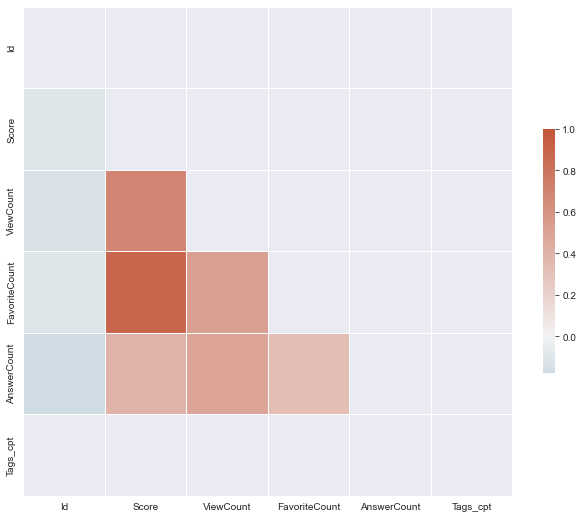

In [567]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

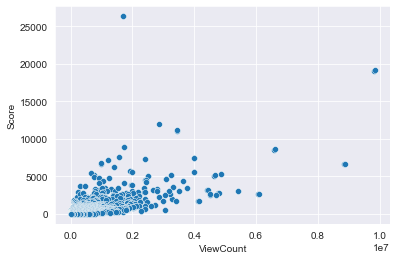

In [568]:
sns.scatterplot(data=df, x="ViewCount", y="Score")
plt.show()

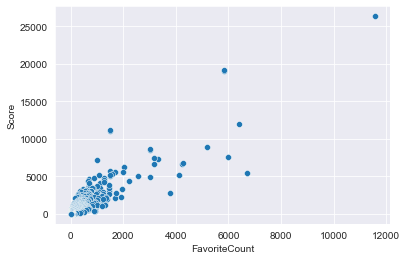

In [569]:
sns.scatterplot(data=df, x="FavoriteCount", y="Score")
plt.show()

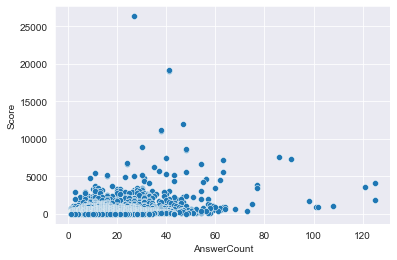

In [570]:
sns.scatterplot(data=df, x="AnswerCount", y="Score")
plt.show()

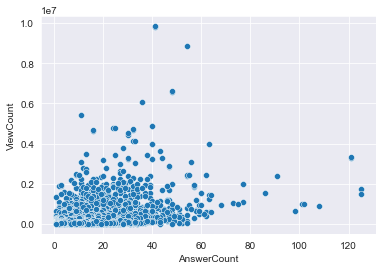

In [571]:
sns.scatterplot(data=df, x="AnswerCount", y="ViewCount")
plt.show()

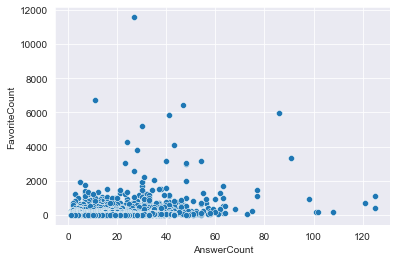

In [572]:
sns.scatterplot(data=df, x="AnswerCount", y="FavoriteCount")
plt.show()

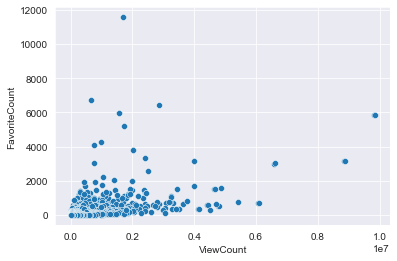

In [573]:
sns.scatterplot(data=df, x="ViewCount", y="FavoriteCount")
plt.show()

## Analyse de texte

In [574]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

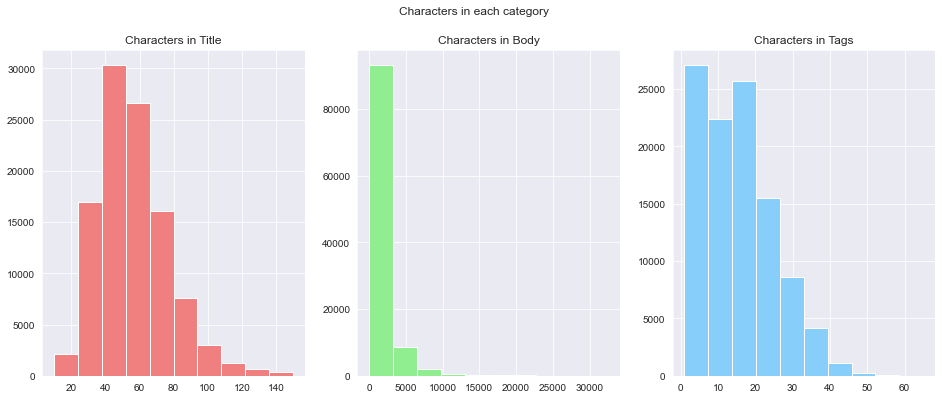

In [575]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,6))
text_len=df['Title'].str.len()
ax1.hist(text_len,color='lightcoral')
ax1.set_title('Characters in Title')
text_len=df['Body'].str.len()
ax2.hist(text_len,color='lightgreen')
ax2.set_title('Characters in Body')
text_len=df['Tags'].str.len()
ax3.hist(text_len,color='lightskyblue')
ax3.set_title('Characters in Tags')
fig.suptitle('Characters in each category')
plt.show()

In [576]:
from bs4 import BeautifulSoup

df['Title'] = df['Title'].apply(lambda x: BeautifulSoup(x, 'html').get_text())
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x, 'html').get_text())

In [577]:
df["Title"]

0         How do I set permissions (attributes) on a fil...
1                  How do you get a directory listing in C?
2                          Returning DataTables in WCF/.NET
3         flutter: no refresh indicator when using Refre...
4         Angularjs Form/Field validation using JavaScri...
                                ...                        
116166                     How to create a grouped bar plot
116167    Python requests SSL error - certificate verify...
116168    How do I parse URL params after a hash with An...
116171    How to change VARCHAR type to DATETIME using A...
116173    Is there a difference when specifying upper bo...
Name: Title, Length: 104923, dtype: object

In [578]:
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['Title'] = df['Title'].str.replace(pat, '')
df['Title'] = df['Title'].str.replace(r'\s+', ' ')
df['Body'] = df['Body'].str.replace(pat, '')
df['Body'] = df['Body'].str.replace(r'\s+', ' ')

In [579]:
df["Title"]

0         How I set permissions (attributes) file ZIP fi...
1                              How get directory listing C?
2                             Returning DataTables WCF/.NET
3         flutter: refresh indicator using RefreshIndicator
4         Angularjs Form/Field validation using JavaScri...
                                ...                        
116166                          How create grouped bar plot
116167    Python requests SSL error - certificate verify...
116168               How I parse URL params hash Angularjs?
116171    How change VARCHAR type DATETIME using ALTER M...
116173    Is difference specifying upper bounds wildcard...
Name: Title, Length: 104923, dtype: object

In [580]:
df["Body"]

0         When I extract files ZIP file created Python z...
1         How scan directory folders files C? It needs c...
2         I WCF service I want return DataTable. I know ...
3         I added RefreshIndicator page, indicator visib...
4         Is way validate field angular without using di...
                                ...                        
116166    The goal create grouped bar plot, subplots lik...
116167    This code import requests requests.get("https:...
116168    I' trying parse access_token Foursquare URL li...
116171    How I change VARCHAR() type DATETIME using ALT...
116173    Suppose I generic class Generic<A extends Base...
Name: Body, Length: 104923, dtype: object

In [581]:
for tags in df["Tags"]:
    print(tags)

python
c,file
c#,.net,web-services
None
javascript,validation,angularjs
javascript,jquery,ajax,html
php,mysql
.net,class
.net,windows
c,image,opencv
asp.net-mvc,unit-testing
python,shell
java,xml,json
css
c++,unit-testing
ruby-on-rails,ruby
None
xcode,macos,templates
php,mysql
sql-server
java,security
algorithm
c++,c,gcc
c#,java,.net,dictionary
javascript
spring,hibernate,spring-boot
sql-server
api
jquery,ajax,http,forms
git
c#,.net
algorithm
javascript
java,c++,generics,templates
php,security
python
c#,.net,sql
bash,unix,docker
objective-c,windows,gcc
.net,sql
oop
oop
c#,.net
c#,.net
string
.net,wpf,winforms
sql,sql-server,tsql
python
javascript,jquery,html
c++,debugging
java,oop
oop
sql-server
c#,.net,concurrency
c#,lambda
node.js,amazon-web-services,docker
asp.net,javascript,jquery,visual-studio
windows
c#,.net,xml
python,sql,database
php,mysql,sql,security
.net
windows,bash,unix,shell
windows
java,unit-testing
java
unit-testing
javascript,jquery,twitter-bootstrap
python,dictionary


In [582]:
df["Tags_cpt"] = df.Tags.str.len()

On stock ici le nombre de tags de chaque post 

In [583]:
df["Tags_cpt"].describe()

count    104923.000000
mean         15.389457
std           9.408979
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          65.000000
Name: Tags_cpt, dtype: float64

Il y a un maximum de 5 tags pour chaque post, on va donc découper nos tags sur 5 colonnes et remplir les champs vides par le premier tag

In [584]:
df_tags

Tags1       Tags2      Tags3         Tags4 Tags5
0           python        None       None          None  None
1                c        file       None          None  None
2               c#        .net       None  web-services  None
3             None        None       None          None  None
4       javascript  validation  angularjs          None  None
...            ...         ...        ...           ...   ...
116169     android        None       None          None  None
116170          c#        None       None          None  None
116171  javascript         css       html          None  None
116172         git        None       None          None  None
116173        java     android       None          None  None

[116174 rows x 5 columns]

Après certaines réflexions pour la modélisation on a décidé de ne garder que les posts qui ont au moins 3 tags. On va également supprimer les 4èmes et 5èmes tags pour uniformiser la donnée

In [585]:
df = df.join(df_tags)

In [586]:
df

Title  \
0       How I set permissions (attributes) file ZIP fi...   
1                            How get directory listing C?   
2                           Returning DataTables WCF/.NET   
3       flutter: refresh indicator using RefreshIndicator   
4       Angularjs Form/Field validation using JavaScri...   
...                                                   ...   
116166                        How create grouped bar plot   
116167  Python requests SSL error - certificate verify...   
116168             How I parse URL params hash Angularjs?   
116171  How change VARCHAR type DATETIME using ALTER M...   
116173  Is difference specifying upper bounds wildcard...   

                                                     Body  \
0       When I extract files ZIP file created Python z...   
1       How scan directory folders files C? It needs c...   
2       I WCF service I want return DataTable. I know ...   
3       I added RefreshIndicator page, indicator visib...   
4       Is way validate field angular without using di...   
...                                                   ...   
116166  The goal create grouped bar plot, subplots lik...   
116167  This code import requests requests.get("https:...   
116168  I' trying parse access_token Foursquare URL li...   
116171  How I change VARCHAR() type DATETIME using ALT...   
116173  Suppose I generic class Generic<A extends Base...   

                                      Tags        Id  Score  ViewCount  \
0                                   python    434641     46      29340   
1                                   c,file     12489     65     136478   
2                     c#,.net,web-services     12702     51      56219   
3                                     None  54051121     33      46515   
4          javascript,validation,angularjs  18125777     10      30234   
...                                    ...       ...    ...        ...   
116166                             haskell  47796264     22      50705   
116167                   javascript,jquery  46604114     22     102038   
116168  mysql,security,amazon-web-services  20878335     22      53695   
116171                 javascript,css,html  15335880     22      44698   
116173                        java,android  48170539     22        671   

        FavoriteCount  AnswerCount  Tags_cpt       Tags1       Tags2  \
0                 7.0            8         6      python        None   
1                21.0            9         6           c        file   
2                12.0            8        20          c#        .net   
3                 7.0            5         4        None        None   
4                 7.0            4        31  javascript  validation   
...               ...          ...       ...         ...         ...   
116166           11.0            4         7     haskell        None   
116167            8.0            4        17  javascript      jquery   
116168            6.0            4        34       mysql    security   
116171            5.0            3        19  javascript         css   
116173           10.0            1        12        java     android   

                      Tags3         Tags4 Tags5  
0                      None          None  None  
1                      None          None  None  
2                      None  web-services  None  
3                      None          None  None  
4                 angularjs          None  None  
...                     ...           ...   ...  
116166                 None          None  None  
116167                 None          None  None  
116168  amazon-web-services          None  None  
116171                 html          None  None  
116173                 None          None  None  

[104923 rows x 14 columns]

In [587]:
df = df.dropna()
df

Title  \
0       How I set permissions (attributes) file ZIP fi...   
1                            How get directory listing C?   
2                           Returning DataTables WCF/.NET   
3       flutter: refresh indicator using RefreshIndicator   
4       Angularjs Form/Field validation using JavaScri...   
...                                                   ...   
116166                        How create grouped bar plot   
116167  Python requests SSL error - certificate verify...   
116168             How I parse URL params hash Angularjs?   
116171  How change VARCHAR type DATETIME using ALTER M...   
116173  Is difference specifying upper bounds wildcard...   

                                                     Body  \
0       When I extract files ZIP file created Python z...   
1       How scan directory folders files C? It needs c...   
2       I WCF service I want return DataTable. I know ...   
3       I added RefreshIndicator page, indicator visib...   
4       Is way validate field angular without using di...   
...                                                   ...   
116166  The goal create grouped bar plot, subplots lik...   
116167  This code import requests requests.get("https:...   
116168  I' trying parse access_token Foursquare URL li...   
116171  How I change VARCHAR() type DATETIME using ALT...   
116173  Suppose I generic class Generic<A extends Base...   

                                      Tags        Id  Score  ViewCount  \
0                                   python    434641     46      29340   
1                                   c,file     12489     65     136478   
2                     c#,.net,web-services     12702     51      56219   
3                                     None  54051121     33      46515   
4          javascript,validation,angularjs  18125777     10      30234   
...                                    ...       ...    ...        ...   
116166                             haskell  47796264     22      50705   
116167                   javascript,jquery  46604114     22     102038   
116168  mysql,security,amazon-web-services  20878335     22      53695   
116171                 javascript,css,html  15335880     22      44698   
116173                        java,android  48170539     22        671   

        FavoriteCount  AnswerCount  Tags_cpt       Tags1       Tags2  \
0                 7.0            8         6      python        None   
1                21.0            9         6           c        file   
2                12.0            8        20          c#        .net   
3                 7.0            5         4        None        None   
4                 7.0            4        31  javascript  validation   
...               ...          ...       ...         ...         ...   
116166           11.0            4         7     haskell        None   
116167            8.0            4        17  javascript      jquery   
116168            6.0            4        34       mysql    security   
116171            5.0            3        19  javascript         css   
116173           10.0            1        12        java     android   

                      Tags3         Tags4 Tags5  
0                      None          None  None  
1                      None          None  None  
2                      None  web-services  None  
3                      None          None  None  
4                 angularjs          None  None  
...                     ...           ...   ...  
116166                 None          None  None  
116167                 None          None  None  
116168  amazon-web-services          None  None  
116171                 html          None  None  
116173                 None          None  None  

[104923 rows x 14 columns]

In [588]:
df = df[df.Tags != "None"]

<AxesSubplot:>

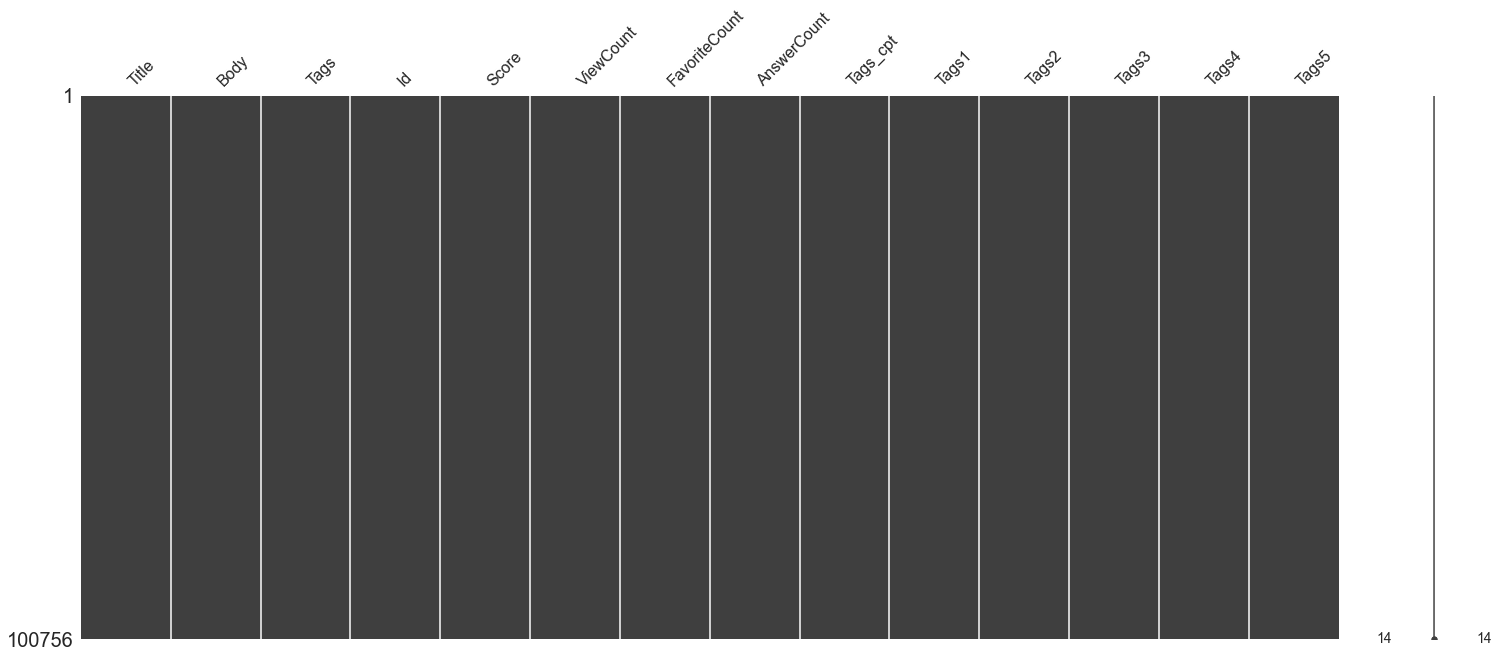

In [589]:
msno.matrix(df)

In [590]:
df.isnull().sum().sum()

0

In [591]:
df = df.drop(['Id','Score','ViewCount','FavoriteCount','AnswerCount','Tags_cpt'], axis=1)

In [592]:
df

Title  \
0       How I set permissions (attributes) file ZIP fi...   
1                            How get directory listing C?   
2                           Returning DataTables WCF/.NET   
4       Angularjs Form/Field validation using JavaScri...   
5                    Scrolling Overflowed DIVs JavaScript   
...                                                   ...   
116166                        How create grouped bar plot   
116167  Python requests SSL error - certificate verify...   
116168             How I parse URL params hash Angularjs?   
116171  How change VARCHAR type DATETIME using ALTER M...   
116173  Is difference specifying upper bounds wildcard...   

                                                     Body  \
0       When I extract files ZIP file created Python z...   
1       How scan directory folders files C? It needs c...   
2       I WCF service I want return DataTable. I know ...   
4       Is way validate field angular without using di...   
5       I' got div uses overflow:auto keep contents in...   
...                                                   ...   
116166  The goal create grouped bar plot, subplots lik...   
116167  This code import requests requests.get("https:...   
116168  I' trying parse access_token Foursquare URL li...   
116171  How I change VARCHAR() type DATETIME using ALT...   
116173  Suppose I generic class Generic<A extends Base...   

                                      Tags       Tags1       Tags2  \
0                                   python      python        None   
1                                   c,file           c        file   
2                     c#,.net,web-services          c#        .net   
4          javascript,validation,angularjs  javascript  validation   
5              javascript,jquery,ajax,html  javascript      jquery   
...                                    ...         ...         ...   
116166                             haskell     haskell        None   
116167                   javascript,jquery  javascript      jquery   
116168  mysql,security,amazon-web-services       mysql    security   
116171                 javascript,css,html  javascript         css   
116173                        java,android        java     android   

                      Tags3         Tags4 Tags5  
0                      None          None  None  
1                      None          None  None  
2                      None  web-services  None  
4                 angularjs          None  None  
5                      ajax          html  None  
...                     ...           ...   ...  
116166                 None          None  None  
116167                 None          None  None  
116168  amazon-web-services          None  None  
116171                 html          None  None  
116173                 None          None  None  

[100756 rows x 8 columns]

In [593]:
df = df.sample(frac=0.30,random_state=1) #Réduction du dataset pour être en dessous de 100Mo pour la webapp
df.to_csv("df.csv", index=False)

In [594]:
df["Tags1"].describe()

count     30227
unique      143
top        java
freq       3712
Name: Tags1, dtype: object

In [595]:
df["Tags2"].describe()

count     30227
unique      149
top        None
freq       7978
Name: Tags2, dtype: object

In [596]:
df["Tags3"].describe()

count     30227
unique      147
top        None
freq      18549
Name: Tags3, dtype: object

In [597]:
df["Tags4"].describe()

count     30227
unique      147
top        None
freq      25990
Name: Tags4, dtype: object

In [598]:
df["Tags5"].describe()

count     30227
unique      123
top        None
freq      29231
Name: Tags5, dtype: object